In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat_lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to the list of cities
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count of 500+ cities
len(cities)

607

The length test has returned a list of 500+ cities. I have conducted a few print tests below to double-check.

In [7]:
print(cities)

['hailar', 'blackmans bay', 'vorgashor', 'santa ana de yacuma', 'grytviken', 'adamstown', 'college', 'vilyuchinsk', 'port alfred', 'punta arenas', 'iqaluit', 'puerto ayora', 'port elizabeth', 'bethel', 'pasni', 'kota belud', 'port mathurin', 'puerto natales', 'taiohae', 'alice springs', 'broken hill', 'aykhal', 'waitangi', 'tongren', 'west island', 'ancud', 'tolanaro', 'dolbeau-mistassini', 'juegang', 'isafjordur', 'yellowknife', 'crane', 'lebu', 'kununurra', 'pasighat', 'akureyri', 'albany', 'laurel', 'kodiak', 'kapuskasing', 'port-aux-francais', 'iskateley', 'thunder bay', 'oliveira dos brejinhos', 'hasaki', 'ta`u', 'lensk', 'tiksi', 'quang ngai', 'regina', 'papatowai', 'khovd', 'whitehorse', 'haiku-pauwela', 'strugi-krasnyye', 'olonkinbyen', 'uturoa', 'itoman', 'dudinka', 'grand falls-windsor', "st. john's", 'ribeira grande', 'ushuaia', 'zaozersk', 'udachny', 'namibe', 'sao jose da coroa grande', 'noumea', 'la passe', 'badger', 'cancun', 'talnakh', 'taroa', 'palmerton', 'hithadhoo',

In [8]:
print(cities[:10])

['hailar', 'blackmans bay', 'vorgashor', 'santa ana de yacuma', 'grytviken', 'adamstown', 'college', 'vilyuchinsk', 'port alfred', 'punta arenas']


In [10]:
print(cities[500:])

['cumberland', 'liberia', 'wetaskiwin', 'kruisfontein', 'zayukovo', 'langres', 'kalinagar', 'sungai penuh', 'thanh hoa', 'russkaya polyana', 'santo antonio', 'am djarass', 'palikir - national government center', 'soacha', 'ilhabela', 'paraisopolis', 'vokhtoga', 'oranjestad', 'sabzevar', 'nemuro', 'klaksvik', 'sittwe', 'wynyard', 'el fasher', 'an nuhud', 'mirriah', 'rio brilhante', 'san luis de la loma', 'xilin hot', 'heyuan', 'puerto deseado', 'quellon', 'el bauga', 'novyy rogachik', 'tamanrasset', 'necochea', 'giridih', 'chernyshevskiy', 'topolobampo', 'sungai raya', 'porto franco', 'nioki', 'whangarei', 'pindiga', 'arrifes', 'taulaga', 'teluknaga', 'rimouski', 'mata-utu', 'fuglafjordur', 'balakhta', 'ritchie', 'varadero', 'shouguang', 'egilsstadir', 'kloulklubed', 'prince rupert', 'saldanha', 'urzhum', 'cannonvale', 'kyaka', 'alaghsas', 'cyangugu', 'boguchany', 'san pedro', 'castillos', 'poyang']


## Performing API Calls
I have already installed and imported requests and time. I have also created a variable for the api_key. 

To perform the API calls, I need to create a base_url variable and an empty list to store successful retrievals. I will also create a counter to keep track of the number of cities.

In [43]:
base_url = f"http://api.openweathermap.org/data/2.5/weather"

weather_data = []
units = 'metric'
city_number = 1

In [44]:
# Creating a print of each city as it's being processed with number and name
for city in cities:
    
    # Construct the URL for the current city
    query_url = f"{base_url}?appid={weather_api_key}&q={city}&units={units}"

    # Make the API call
    response = requests.get(query_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        weather_data.append(response.json())
        print(f"Processing Record {city_number} | {city}")
        city_number += 1
    else:
        print(f"City not found. Skipping {city}.")

Processing Record 1 | albany
Processing Record 2 | thompson
Processing Record 3 | holualoa
Processing Record 4 | upington
Processing Record 5 | port-aux-francais
Processing Record 6 | glendive
Processing Record 7 | port elizabeth
Processing Record 8 | tralee
Processing Record 9 | fuxin
Processing Record 10 | constantia
Processing Record 11 | waitangi
Processing Record 12 | puerto natales
City not found. Skipping musay'id.
Processing Record 13 | todos santos
Processing Record 14 | argo
Processing Record 15 | bethel
Processing Record 16 | portage la prairie
Processing Record 17 | ushuaia
Processing Record 18 | grytviken
Processing Record 19 | hammerfest
Processing Record 20 | mount isa
Processing Record 21 | jamestown
Processing Record 22 | ati
Processing Record 23 | badger
Processing Record 24 | san antonio de pale
Processing Record 25 | agapovka
Processing Record 26 | smithers
Processing Record 27 | nar'yan-mar
City not found. Skipping taiohae.
Processing Record 28 | lindale
Processing

## Converting Raw Data

In [62]:
# Export the raw city data into a .csv
weather_df = pd.DataFrame(weather_data) 
filename = 'weather_data.csv'

In [63]:
weather_df.to_csv(filename, index=False)
weather_df.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,rain,snow
0,"{'lon': -73.9662, 'lat': 42.6001}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 8.83, 'feels_like': 7.31, 'temp_min':...",10000.0,"{'speed': 2.68, 'deg': 280, 'gust': 4.92}",{'all': 55},1710685299,"{'type': 2, 'id': 19530, 'country': 'US', 'sun...",-14400,5106841,Albany,200,NaN,NaN
1,"{'lon': -97.8558, 'lat': 55.7435}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': -20.91, 'feels_like': -27.91, 'temp_m...",10000.0,"{'speed': 5.14, 'deg': 340, 'gust': 9.77}",{'all': 0},1710685299,"{'type': 1, 'id': 935, 'country': 'CA', 'sunri...",-18000,6165406,Thompson,200,NaN,NaN
2,"{'lon': -155.9522, 'lat': 19.6228}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 18.13, 'feels_like': 18.11, 'temp_min...",10000.0,"{'speed': 0, 'deg': 0}",{'all': 20},1710685040,"{'type': 2, 'id': 2002394, 'country': 'US', 's...",-36000,5856050,Holualoa,200,NaN,NaN
3,"{'lon': 21.2561, 'lat': -28.4478}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 38.21, 'feels_like': 34.85, 'temp_min...",10000.0,"{'speed': 3.09, 'deg': 220}",{'all': 0},1710685300,"{'type': 1, 'id': 1990, 'country': 'ZA', 'sunr...",7200,945945,Upington,200,NaN,NaN
4,"{'lon': 70.2167, 'lat': -49.35}","[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,"{'temp': 8.02, 'feels_like': 2.3, 'temp_min': ...",9784.0,"{'speed': 16.99, 'deg': 336, 'gust': 26.85}",{'all': 100},1710685300,"{'country': 'TF', 'sunrise': 1710638193, 'suns...",18000,1546102,Port-aux-Français,200,{'1h': 0.1},NaN


In [66]:
print(weather_df['main'].isnull().sum())

0


In [82]:
cities = [name for name in weather_df['name']]
print(cities)

['Albany', 'Thompson', 'Holualoa', 'Upington', 'Port-aux-Français', 'Glendive', 'Port Elizabeth', 'Tralee', 'Fuxin', 'Constanța', 'Waitangi', 'Puerto Natales', 'Todos Santos', 'Argos', 'Bethel', 'Portage la Prairie', 'Ushuaia', 'Grytviken', 'Hammerfest', 'Mount Isa', 'Jamestown', 'Ati', 'Badger', 'San Antonio de Palé', 'Agapovka', 'Smithers', 'Naryan-Mar', 'Lindale', 'Yellowknife', 'Punta Arenas', 'Isafjordur', 'Tiksi', 'Iqaluit', 'Geraldton', 'Miguel Ahumada', 'Ancud', 'Anadyr', 'Blackmans Bay', 'Saint-Joseph', 'Fortuna', 'Pathein', 'Adamstown', 'Edinburgh of the Seven Seas', 'Selfoss', 'Ribeira Grande', 'Sisimiut', 'Nemuro', 'Bilibino', 'Pisco', 'Gadzhiyevo', 'Davydovka', 'Stanley', 'Natal', 'Puerto Ayora', 'Port Blair', 'San Patricio', 'I-n-Salah', 'Lorengau', 'Carnarvon', 'Lüderitz', 'Avarua', 'Papatowai', 'Lebu', 'Fale old settlement', 'Vilyuchinsk', 'Nova Sintra', 'Chenzhou', 'Stewartville', 'Arraial do Cabo', 'Socorro', 'Xilin Hot', 'Kalmunai', 'Arteche', 'Wailua Homesteads', 'P

In [83]:

temp_max_values = [main['temp_max'] for main in weather_df['main']]
print(temp_max_values)

humidity = [main['humidity'] for main in weather_df['main']]
print(humidity)

cloudiness = [clouds['all'] for clouds in weather_df['clouds']]
print(cloudiness)

wind_speed = [wind['speed'] for wind in weather_df['wind']]
print(wind_speed)

country = [sys['country'] for sys in weather_df['sys']]
print(country)

date = [dt for dt in weather_df['dt']]
print(date)

[10.25, -20.91, 20.91, 38.21, 8.02, -4.9, 22.28, 14.14, 3.3, 13.38, 13.23, 3.25, 16.28, 16.55, 11.78, -8.83, 3.81, 4.56, -3.75, 27.87, 5.57, 40.35, -12.07, 29.44, -2.44, -2.82, -8.27, 14.97, -8.66, 6.06, -7.7, -28.03, -20.73, 22.23, 10.53, 12.55, -19.72, 14.18, 29.21, 9.25, 24.83, 25.99, 18.54, 4.47, 17.65, -13.84, 0.73, -24.62, 24.45, -5.87, 5.62, 13.49, 33.12, 29.98, 28.02, 22.13, 29.73, 27.2, 27.15, 22.91, 23.03, 9.49, 14.09, 28.77, -0.85, 23.92, 17.76, -3.69, 33.98, 11.13, -3.74, 26.54, 24.33, 19.3, 27.55, 7.29, -10.99, 13.95, -3.94, 28.76, 16.22, 0.53, 21.64, 1.03, 25.92, 11.12, 20.58, -22.09, 20.38, -2.23, 8.81, -5.06, -11.12, 24.82, 4.95, 4.43, 23.71, 13.46, -2.1, 26.74, 30.53, 6.72, 9.46, 26.34, 35.38, 13.27, 15.92, 34.94, 0.96, -8.18, 31.83, 23.6, 20.4, 9.45, 19.73, 28.21, 31.47, 28.58, 30.87, -6.61, 32.95, -12.03, 16.74, 28.36, 14.39, 8.49, -19.83, 19.79, 32.5, 22.23, 27.81, 12.47, 26.6, 21.05, -13.08, 30.04, 30.02, 26.54, 28.94, -16.55, 8.86, 23.22, 22.54, -0.86, 12.82, 5.55

In [84]:
# Creating a dictionary to store the variables that will be used in the next step to create a dataframe.

weather_dict = {
    'City': cities,
    'Lat': [coord['lat'] for coord in weather_df['coord']],
    'Lng': [coord['lon'] for coord in weather_df['coord']],
    'Max Temp': temp_max_values,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

This was not the most elegant way of drawing out specific information and certainly proved frustrating. However, it served as a good coding lesson re: APIs and making requests for particular columns at the beginning of the data acquisition process.

In [85]:
# Confirming that all of the required variables are of the same length (i.e. there is information for all of the cities)

print("Length of cities list:", len(cities))
print("Length of latitudes list:", len(weather_dict['Lat']))
print("Length of longitudes list:", len(weather_dict['Lng']))
print("Length of max temp list:", len(weather_dict['Max Temp']))
print("Length of humidity list:", len(weather_dict['Humidity']))
print("Length of cloudiness list:", len(weather_dict['Cloudiness']))
print("Length of wind speed list:", len(weather_dict['Wind Speed']))
print("Length of country list:", len(weather_dict['Country']))
print("Length of date list:", len(weather_dict['Date']))

Length of cities list: 580
Length of latitudes list: 580
Length of longitudes list: 580
Length of max temp list: 580
Length of humidity list: 580
Length of cloudiness list: 580
Length of wind speed list: 580
Length of country list: 580
Length of date list: 580


In [86]:
# Creating a new dataframe from the mass of information acquired from the API request.

filtered_weather_data = pd.DataFrame(weather_dict)
filtered_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,10.25,67,55,2.68,US,1710685299
1,Thompson,55.7435,-97.8558,-20.91,71,0,5.14,CA,1710685299
2,Holualoa,19.6228,-155.9522,20.91,81,20,0.00,US,1710685040
3,Upington,-28.4478,21.2561,38.21,4,0,3.09,ZA,1710685300
4,Port-aux-Français,-49.3500,70.2167,8.02,95,100,16.99,TF,1710685300


## Plotting the Data

In [ ]:
"""Reference 5.2.9 in class activities for scatter plots

This is the code I found in the class activities that would create the scatter plot. 
I successfully used it as the base of the plots below, and for both northern and southern hemispheres.
For each plot, I changed the dataframe to the filtered_weather_data and updating the x and y values.

x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
"""

In the following section, I have created a series of scatter plots to showcase various data relationships.

# Temperature (C) vs. Latitude

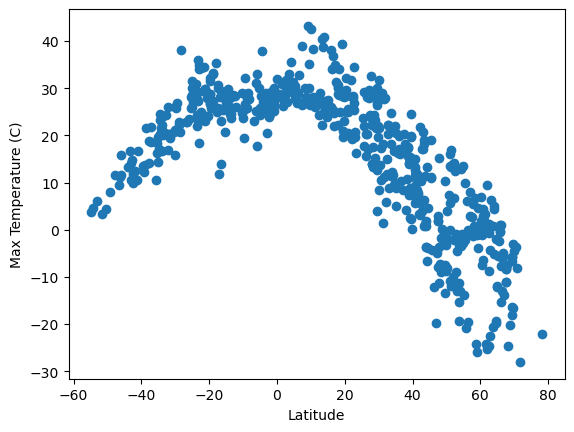

In [88]:

x_values = filtered_weather_data['Lat']
y_value_temp = filtered_weather_data['Max Temp']
plt.scatter(x_values, y_value_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

# Humidity (%) vs. Latitude

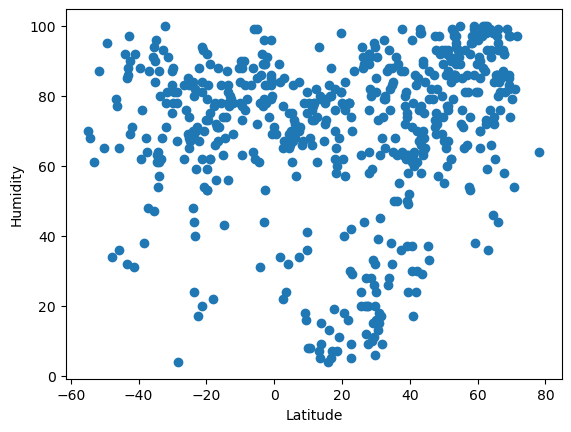

In [95]:
x_values = filtered_weather_data['Lat']
y_value_humid = filtered_weather_data['Humidity']
plt.scatter(x_values, y_value_humid)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

# Cloudiness (%) vs. Latitude

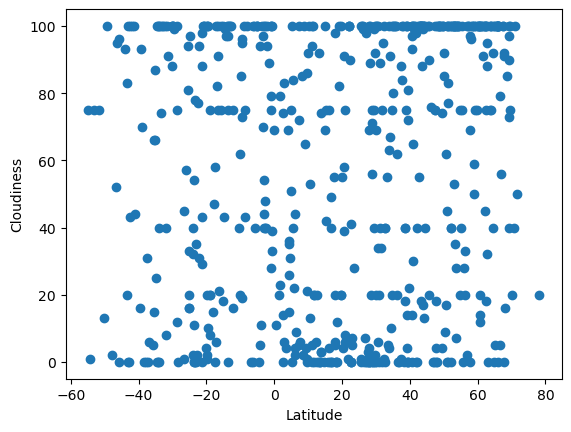

In [96]:
x_values = filtered_weather_data['Lat']
y_value_cloud = filtered_weather_data['Cloudiness']
plt.scatter(x_values, y_value_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Wind Speed (mph) vs. Latitude

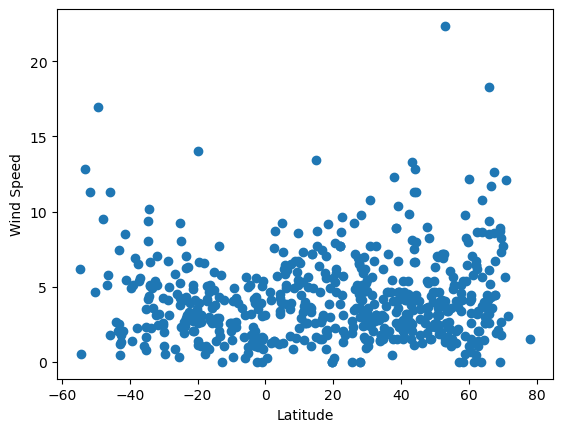

In [97]:
x_values = filtered_weather_data['Lat']
y_value_wind = filtered_weather_data['Wind Speed']
plt.scatter(x_values, y_value_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In this following section, I have separated the plots into Northern Hemisphere (>= 0 degrees latitude) and Southern Hemisphere (<= 0 degrees latitude).

In [99]:
northern_hemisphere_lat = filtered_weather_data[filtered_weather_data['Lat'] > 0]
southern_hemisphere_lat = filtered_weather_data[filtered_weather_data['Lat'] < 0]

# Northern Hemisphere: Temperature (C) vs. Latitude

In [100]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

# Set your x and y and reshape to np array
x = northern_hemisphere_lat['Lat'].values.reshape(-1, 1) 
y = northern_hemisphere_lat['Max Temp'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
northern_hemisphere_lat['Max Temp Prediction'] = linear_regressor.predict(x)

/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_17251/2085755134.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemisphere_lat['Max Temp Prediction'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Max Temp'>

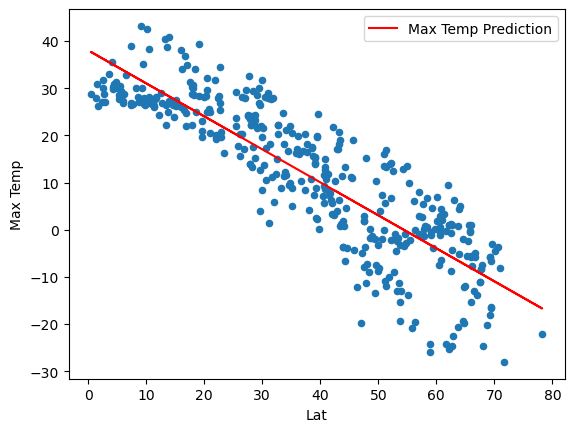

In [101]:
"""x_values = northern_hemisphere_lat['Lat']
y_value_temp = northern_hemisphere_lat['Max Temp']
plt.scatter(x_values, y_value_temp)
plt.xlabel('Northern Hemisphere - Latitude')
plt.ylabel('Northern Hemisphere - Max Temperature (C)')
plt.show()"""

# Plot the data
ax = northern_hemisphere_lat.plot.scatter(x='Lat', y='Max Temp')
northern_hemisphere_lat.plot(x='Lat', y='Max Temp Prediction', color='red', ax=ax)


# Southern Hemisphere - Temperature (C) vs. Latitude

/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_17251/3744192967.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemisphere_lat['Max Temp Prediction'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Max Temp'>

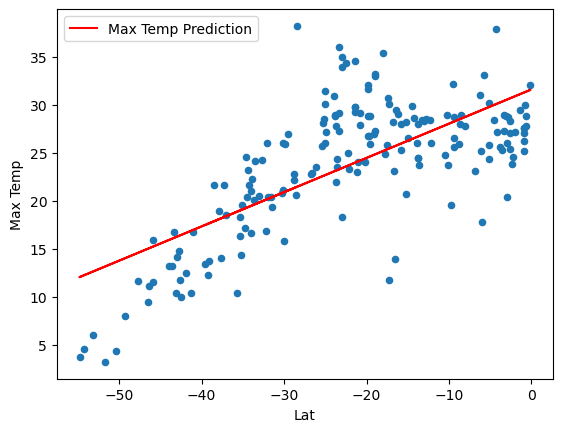

In [102]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

# Set your x and y and reshape to np array
x = southern_hemisphere_lat['Lat'].values.reshape(-1, 1) 
y = southern_hemisphere_lat['Max Temp'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
southern_hemisphere_lat['Max Temp Prediction'] = linear_regressor.predict(x)

# Southern Hemisphere - Temperature (C) vs. Latitude

# Plot the data
ax = southern_hemisphere_lat.plot.scatter(x='Lat', y='Max Temp')
southern_hemisphere_lat.plot(x='Lat', y='Max Temp Prediction', color='red', ax=ax)

# Northern Hemisphere - Humidity (%) vs. Latitude

In [104]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

# Set your x and y and reshape to np array
x = northern_hemisphere_lat['Lat'].values.reshape(-1, 1) 
y = northern_hemisphere_lat['Humidity'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
northern_hemisphere_lat['Humidity Prediction'] = linear_regressor.predict(x)

/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_17251/4222929401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemisphere_lat['Humidity Prediction'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Humidity'>

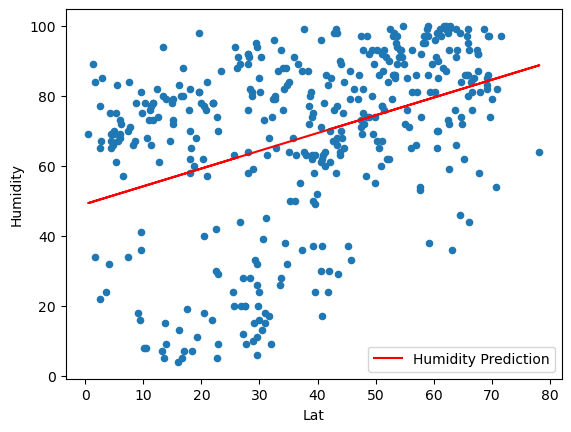

In [106]:
# Plot the data
ax = northern_hemisphere_lat.plot.scatter(x='Lat', y='Humidity')
northern_hemisphere_lat.plot(x='Lat', y='Humidity Prediction', color='red', ax=ax)


# Southern Hemisphere - Humidity (%) vs. Latitude

In [107]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

# Set your x and y and reshape to np array
x = southern_hemisphere_lat['Lat'].values.reshape(-1, 1) 
y = southern_hemisphere_lat['Humidity'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
southern_hemisphere_lat['Humidity Prediction'] = linear_regressor.predict(x)

/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_17251/2013682912.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemisphere_lat['Humidity Prediction'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Humidity'>

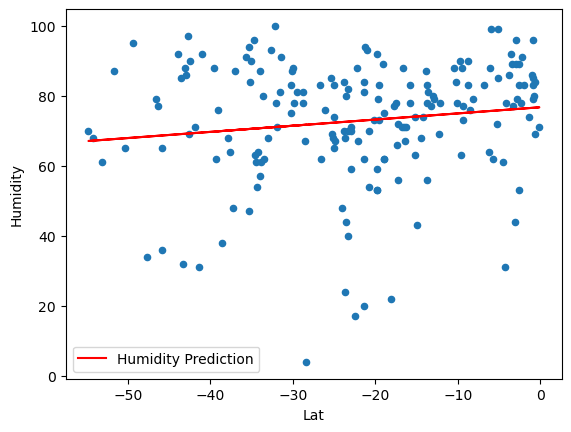

In [108]:
# Plot the data
ax = southern_hemisphere_lat.plot.scatter(x='Lat', y='Humidity')
southern_hemisphere_lat.plot(x='Lat', y='Humidity Prediction', color='red', ax=ax)

# Northern Hemisphere - Cloudiness (%) vs. Latitude

In [109]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

# Set your x and y and reshape to np array
x = northern_hemisphere_lat['Lat'].values.reshape(-1, 1) 
y = northern_hemisphere_lat['Cloudiness'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
northern_hemisphere_lat['Cloudiness Prediction'] = linear_regressor.predict(x)

/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_17251/2095419057.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemisphere_lat['Cloudiness Prediction'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Cloudiness'>

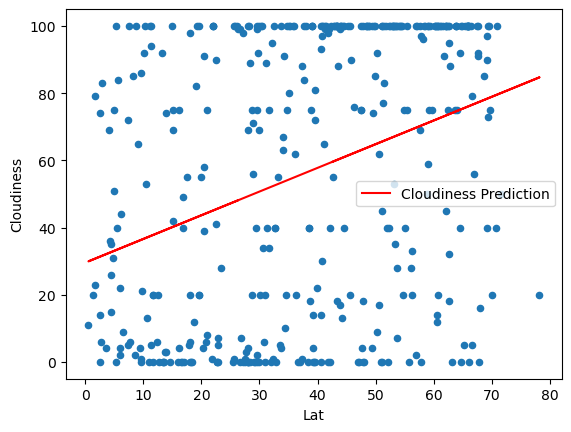

In [110]:
ax = northern_hemisphere_lat.plot.scatter(x='Lat', y='Cloudiness')
northern_hemisphere_lat.plot(x='Lat', y='Cloudiness Prediction', color='red', ax=ax)

# Southern Hemisphere - Cloudiness (%) vs. Latitude

In [111]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

# Set your x and y and reshape to np array
x = southern_hemisphere_lat['Lat'].values.reshape(-1, 1) 
y = southern_hemisphere_lat['Cloudiness'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
southern_hemisphere_lat['Cloudiness Prediction'] = linear_regressor.predict(x)

/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_17251/2620076708.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemisphere_lat['Cloudiness Prediction'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Cloudiness'>

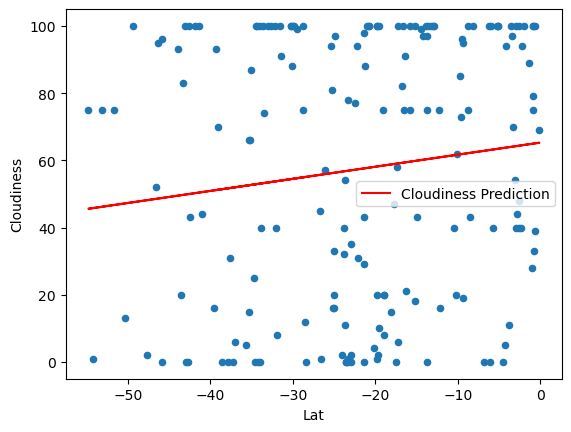

In [112]:
ax = southern_hemisphere_lat.plot.scatter(x='Lat', y='Cloudiness')
southern_hemisphere_lat.plot(x='Lat', y='Cloudiness Prediction', color='red', ax=ax)

# Cloudiness Analysis
This is a more interesting plot, as the cloudiness increases in the southern hemisphere, the closer one gets to the equator. However, it must be noted that the majority of data points are all over the graph, therefore I do not think there is much correlation to be observed. The northern hemisphere graph 

# Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [115]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

# Set your x and y and reshape to np array
x = northern_hemisphere_lat['Lat'].values.reshape(-1, 1) 
y = northern_hemisphere_lat['Wind Speed'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
northern_hemisphere_lat['Wind Speed Prediction'] = linear_regressor.predict(x)

/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_17251/1375503158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemisphere_lat['Wind Speed Prediction'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Wind Speed'>

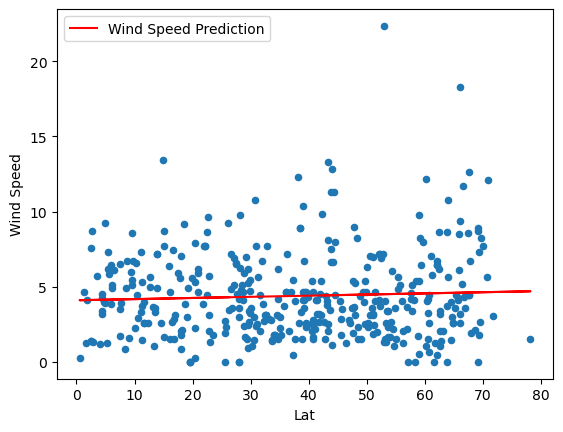

In [116]:
ax = northern_hemisphere_lat.plot.scatter(x='Lat', y='Wind Speed')
northern_hemisphere_lat.plot(x='Lat', y='Wind Speed Prediction', color='red', ax=ax)

# Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [113]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

# Set your x and y and reshape to np array
x = southern_hemisphere_lat['Lat'].values.reshape(-1, 1) 
y = southern_hemisphere_lat['Wind Speed'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
southern_hemisphere_lat['Wind Speed Prediction'] = linear_regressor.predict(x)

/var/folders/7_/1sj7vc495_z4fzf1l_tpnznc0000gn/T/ipykernel_17251/3549305181.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemisphere_lat['Wind Speed Prediction'] = linear_regressor.predict(x)


<Axes: xlabel='Lat', ylabel='Wind Speed'>

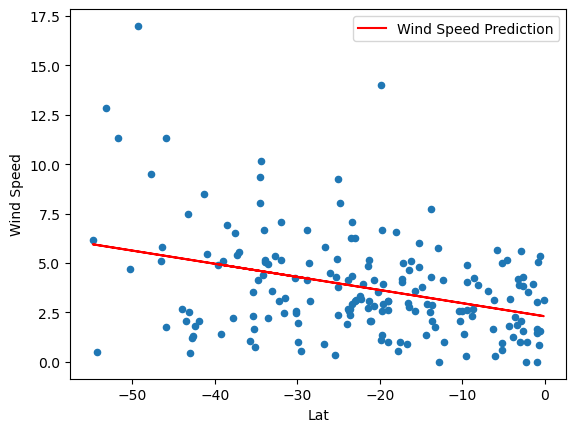

In [114]:
ax = southern_hemisphere_lat.plot.scatter(x='Lat', y='Wind Speed')
southern_hemisphere_lat.plot(x='Lat', y='Wind Speed Prediction', color='red', ax=ax)

# Wind Speed Analysis
In the northern hemisphere, there doesn't seem to be much of a relationship between latitude and wind speed, which remains mostly constant across all of the different latitudes. On the other hand, there exists some positive relationship between latitude and wind speed in the southern hemisphere: as you get closer to the equator, there appears to be a consistent overall reduction in wind speed.

In [ ]:
After each plot, add a sentence or two explaining what the code is analyzing.

After each pair of plots, take the time to explain what the linear regression is modeling. 

For example, describe any relationships you notice and any other analysis you may have.